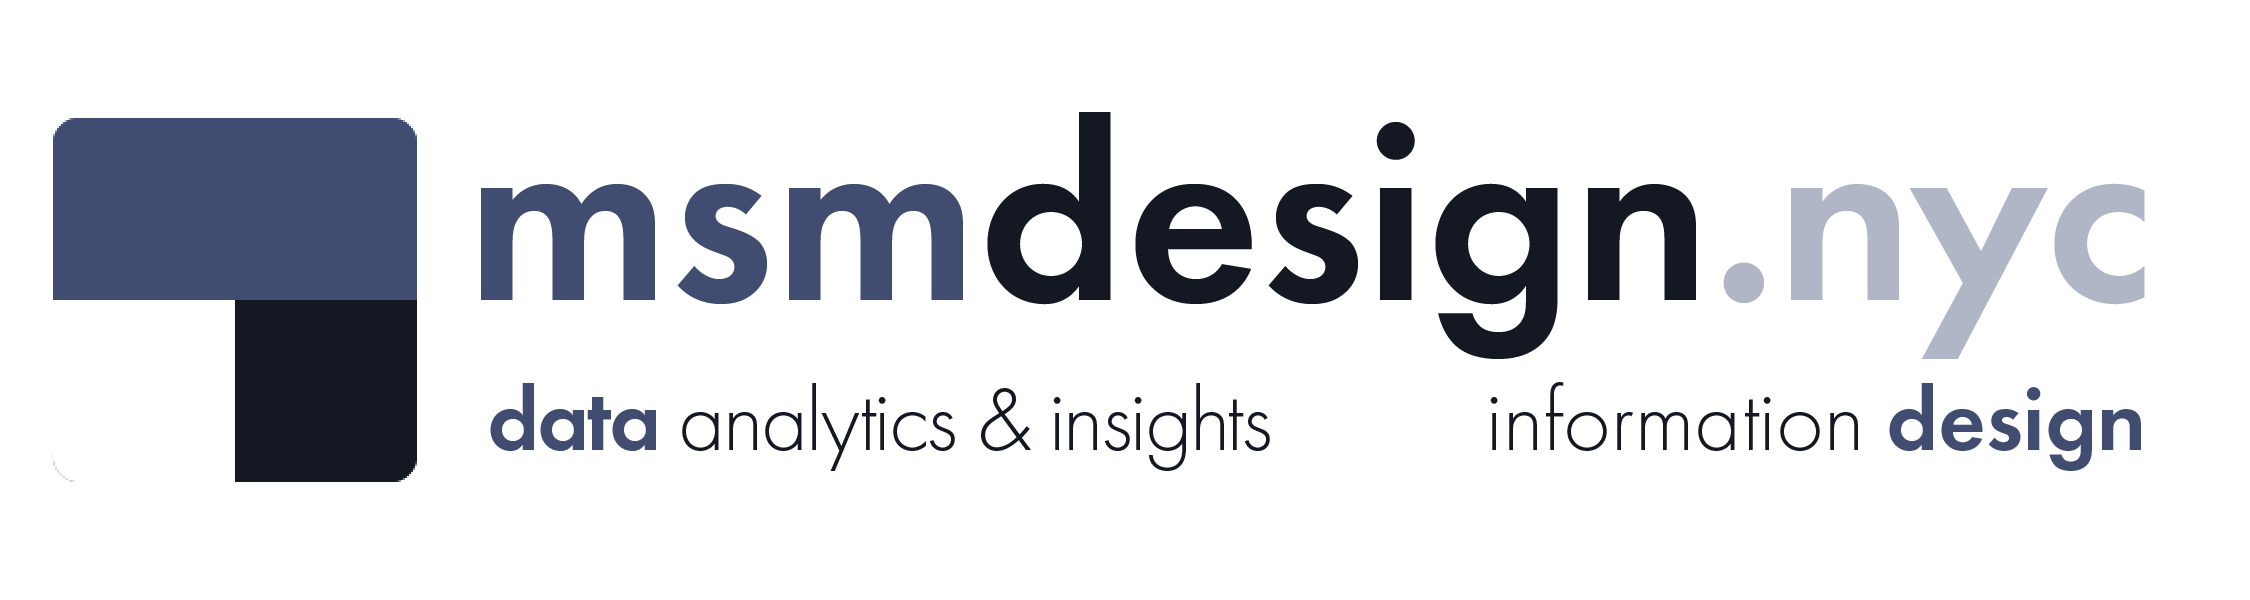

---
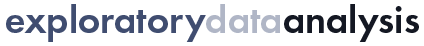

---

> ### What is Exploratory Data Analysis?
> **Exploratory data analysis (EDA)** is a technique used by data scientists to inspect, characterize and briefly summarize the contents of a dataset. EDA is often the first step when encountering a new or unfamiliar dataset. EDA helps the data scientist become acquainted with a dataset and test some basic assumptions about the data. By the end of the EDA process, some initial insights can be drawn from the dataset and a framework for further analysis or modeling is established.

---

# DCA Fines and Fees

**Dataset Analyzed:** *DCA Fines and Fees*

**About This Dataset:** All fees charged by DCA for services and, all fines issued by an administrative judge resulting from violations. Each row is a fine or fee. Data provided by the Department of Consumer and Worker Protection (DCWP), the City of New York: https://data.cityofnewyork.us/Business/DCA-Fines-and-Fees/2k3g-r445



**Acknowledgements:** NYC Open Data https://opendata.cityofnewyork.us/


**EDA Catalogue Number:** INS-006


**EDA Publication Date:** Saturday, January 7, 2023


**Language:** Python


**Libraries Used:** NumPy, pandas, matplotlib, seaborn


**EDA Author:** David White


**Contact:** david@msmdesign.nyc | [msmdesign.nyc](https://msmdesign.nyc/)

---

## **0. Prepare the workspace**

### 0.1 Import Python libraries, packages and functions

In [3]:
# import libraries for data wrangling, aggregate functions and basic descriptive statistics
import numpy as np
import pandas as pd

# import data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

### 0.2 Adjust display options to make plots easier to read and understand

In [92]:
# specify seaborn styling options
sns.set_theme(
    context='talk', 
    style='whitegrid', 
    palette='viridis',
    font='Courier New', 
    font_scale=1.15)    

# allow plots to display inline within the notebook
%matplotlib inline

### 0.3 Set Markdown tables to align-left within notebook cells

In [1]:
%%html
<style>
table {float:left}
</style>

### 0.4 Display all rows of output by default

In [75]:
pd.set_option('display.max_rows', None)

# to reset:
# pd.reset_option('display.max_rows')

### 0.5 Format large numbers and display floating point values to two decimal places

In [172]:
pd.set_option('display.float_format',  '{:,.2f}'.format)

# to reset:
# pd.reset_option('display.float_format')

### 0.6 Load the raw data file into the notebook and visually confirm that it has been read in as expected

In [135]:
# load the data from a csv file (stored locally) into a new DataFrame object

csv = r"F:\Creative Cloud Files\MSM Client 001 - Mister Shepherd Media LLC\MSM Design\github_msm_design\exploratory-data-analysis\insights-made-fresh-daily\nyc-open-data\ins-006\data\DCA_Fines_and_Fees.csv"

fees_temp = pd.read_csv(csv, encoding='utf-8')

In [136]:
# glimpse the first three rows

fees_temp.head(3)

,RECORD ID,RECORD TYPE,BUSINESS NAME,BUSINESS NAME2,INDUSTRY,FEE SEQUENCE ID,FEE TYPE,FEE DESCRIPTION,FEE AMOUNT,FEE DATE,FEE STATUS
0,0829164-AMPP,Application,"DACOSTA, WINSTON",NaN,Motion Picture Projectionist - 123,1370511,PLANREVIEW,Plan Review Fee,60.00,01/01/1989,INVOICED
1,0828326-ATTD,Application,"MAZZIO, MICHAEL R",NaN,Tow Truck Driver - 125,1436584,PLANREVIEW,Plan Review Fee,20.00,01/01/1992,INVOICED
2,00777032-1-ENFO,Enforcement,JAY AMBAY INC.,PATEL BROTHERS,Stoop Line Stand - 033,240179,CNV_SI,SI - Certificate of Inspection fee (scales),40.00,01/01/2000,INVOICED


In [137]:
# glimpse the last three rows

fees_temp.tail(3)

,RECORD ID,RECORD TYPE,BUSINESS NAME,BUSINESS NAME2,INDUSTRY,FEE SEQUENCE ID,FEE TYPE,FEE DESCRIPTION,FEE AMOUNT,FEE DATE,FEE STATUS
2565578,7398-2021-AGAR,Application,MRK GARAGE LLC,NaN,Garage - 049,3398901,LICENSE,Garage or Parking Lot License Fee,405.00,12/31/2021,INVOICED
2565579,7399-2021-AGAR,Application,WEST 12TH STREET GARAGE LLC,NaN,Garage - 049,3398903,LICENSE,Garage or Parking Lot License Fee,285.00,12/31/2021,INVOICED
2565580,7400-2021-AEHD,Application,GIFTED TECHNOLOGIES REPAIR HUB LLC,NaN,Electronic & Home Appliance Service Dealer - 115,3398919,LICENSE,Electronic & Home Appliance Service Dealer Lic...,170.00,12/31/2021,INVOICED


In [138]:
# glimpse ten randomly selected rows

fees_temp.sample(10, random_state=72)

,RECORD ID,RECORD TYPE,BUSINESS NAME,BUSINESS NAME2,INDUSTRY,FEE SEQUENCE ID,FEE TYPE,FEE DESCRIPTION,FEE AMOUNT,FEE DATE,FEE STATUS
1564258,4479-2020-ADJC,Adjudication,DUANE READE ETAL PTRS,NaN,Drug Store Retail - 810,3197797,OL VIO,OL - Other Violation,500.00,08/10/2020,INVOICED
1673805,1191552-RTTD,Renewal,"ANAZAGASTY, CHELIN",NaN,Tow Truck Driver - 125,736472,RENEWAL,Tow Truck Driver License Renewal Fee,28.50,08/29/2006,INVOICED
1257701,4491-2022-ASTF,Application,"BROWN, JOEDE",NaN,Temporary Street Fair Vendor Permit - 111,3457665,LICENSE,Temporary Street Fair Vendor License Fee,10.00,06/22/2022,INVOICED
2275294,398-2021-MBGO,Amendment,PELHAM PARKWAY BABE RUTH LADIES AUXILIARY,NaN,Bingo Game Operator - 089,3391235,BC-7 FEE,BC-7 Additional License Fee,7.89,11/23/2021,INVOICED
1444684,1469760-AHIC,Application,HIBISCUS FLOWERS INC.,NaN,Home Improvement Contractor - 100,1251260,FINGERPRINT,Fingerprint Fee,75.00,07/22/2013,INVOICED
534364,0952131-RLKS,Renewal,"CARPIO, LUIS V",NaN,Locksmith - 062,1418003,RENEWAL,Locksmith Renewal Fee,100.00,03/13/2009,INVOICED
1149774,CL000214272-ADJC,Adjudication,CHILGOK PUNGMI SUNSIK INC,NATURAL HEALTH FOOD,Misc Non-Food Retail - 817,142870,CL VIO,CL - Consumer Law Violation,250.00,06/08/2011,INVOICED
1800023,1261849-RHIS,Renewal,"NORIEGA, KENWYN",NaN,Home Improvement Salesperson - 101,841394,RENEWAL,Home Improvement Salesperson Renewal Fee,50.00,09/19/2011,INVOICED
2375619,0842694-RHIS,Renewal,"COLMONE, GASPARE",NaN,Home Improvement Salesperson - 101,1304116,RENEWAL,Home Improvement Salesperson Renewal Fee,50.00,12/07/1994,INVOICED
1193700,09104986-1-ENFO,Enforcement,COLON DELI GROCERY CORP.,NaN,Grocery-Retail - 808,326935,CNV_SI,SI - Certificate of Inspection fee (scales),20.00,06/14/2011,INVOICED


**The data has been loaded and has been read in as expected.**

### 0.7. Check the data type of each column

In [139]:
# display a listing of each of the DataFrame's columns and its data type

fees_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565581 entries, 0 to 2565580
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   RECORD ID        object 
 1   RECORD TYPE      object 
 2   BUSINESS NAME    object 
 3   BUSINESS NAME2   object 
 4   INDUSTRY         object 
 5   FEE SEQUENCE ID  int64  
 6   FEE TYPE         object 
 7   FEE DESCRIPTION  object 
 8   FEE AMOUNT       float64
 9   FEE DATE         object 
 10  FEE STATUS       object 
dtypes: float64(1), int64(1), object(9)
memory usage: 215.3+ MB


**Nearly all of the columns have been read in as *object* data type. We'll need to change the data type of some columns to a something more appropriate.**

### 0.8 Refer to the [data dictionary](https://data.cityofnewyork.us/api/views/2k3g-r445/files/8b18761e-795e-45dc-8305-a13d8eb7f082?download=true&filename=DCA_Fines_Fees_data_dictionary.xlsx) and make sure that our DataFrame's data types match the source data. Reassign data types where needed.

In [140]:
# cast column(s) containing dates to datetime data type

fees_temp['FEE DATE'] = pd.to_datetime(fines_temp['FEE DATE'], errors='coerce')

In [141]:
# cast column(s) containing categorical varibles to categorical data type

fees_temp['RECORD TYPE'] = fees_temp['RECORD TYPE'].astype('category')
fees_temp['INDUSTRY'] = fees_temp['INDUSTRY'].astype('category')
fees_temp['FEE TYPE'] = fees_temp['FEE TYPE'].astype('category')
fees_temp['FEE STATUS'] = fees_temp['FEE STATUS'].astype('category')

In [142]:
# display the DataFrame info once again to confirm that the data type changes have been made

fees_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565581 entries, 0 to 2565580
Data columns (total 11 columns):
 #   Column           Dtype         
---  ------           -----         
 0   RECORD ID        object        
 1   RECORD TYPE      category      
 2   BUSINESS NAME    object        
 3   BUSINESS NAME2   object        
 4   INDUSTRY         category      
 5   FEE SEQUENCE ID  int64         
 6   FEE TYPE         category      
 7   FEE DESCRIPTION  object        
 8   FEE AMOUNT       float64       
 9   FEE DATE         datetime64[ns]
 10  FEE STATUS       category      
dtypes: category(4), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 151.7+ MB


---

## **1. Describe the characteristics of the dataset**

### 1.1 How many rows and how many columns are in our dataset?

In [143]:
# display the number of rows and columns in the DataFrame

rows = fees_temp.shape[0]
columns = fees_temp.shape[1]

print(f'There are {rows} rows and {columns} columns in the dataset.')

There are 2565581 rows and 11 columns in the dataset.


### 1.2 Identify the index of our DataFrame

In [144]:
# display the index of the DataFrame

fees_temp.index

RangeIndex(start=0, stop=2565581, step=1)

Our DataFrame has an interger index. We know from the data dictionary that each row is an individual fine or fee.

### 1.3 What are the column headings in our dataset?

In [145]:
# display a list of the DataFrame's columns

list(fees_temp.columns)

['RECORD ID',
 'RECORD TYPE',
 'BUSINESS NAME',
 'BUSINESS NAME2',
 'INDUSTRY',
 'FEE SEQUENCE ID',
 'FEE TYPE',
 'FEE DESCRIPTION',
 'FEE AMOUNT',
 'FEE DATE',
 'FEE STATUS']

### 1.4 What are the data types of each column?

In [146]:
# display the data type of each column in the DataFrame

fees_temp.dtypes

RECORD ID                  object
RECORD TYPE              category
BUSINESS NAME              object
BUSINESS NAME2             object
INDUSTRY                 category
FEE SEQUENCE ID             int64
FEE TYPE                 category
FEE DESCRIPTION            object
FEE AMOUNT                float64
FEE DATE           datetime64[ns]
FEE STATUS               category
dtype: object

### 1.5 How many null values are in each column?

In [147]:
# display the number of missing values in each column of the DataFrame

fees_temp.isna().sum()

RECORD ID                0
RECORD TYPE              0
BUSINESS NAME         6068
BUSINESS NAME2     1908343
INDUSTRY             48507
FEE SEQUENCE ID          0
FEE TYPE                 0
FEE DESCRIPTION          0
FEE AMOUNT               0
FEE DATE                 0
FEE STATUS               0
dtype: int64

### 1.6 How many unique values are there in each column?

In [148]:
# display the count of unique elements in each column

fees_temp.nunique(axis=0, dropna=True)

RECORD ID          1295259
RECORD TYPE             25
BUSINESS NAME       321251
BUSINESS NAME2       64023
INDUSTRY               130
FEE SEQUENCE ID    2565579
FEE TYPE               167
FEE DESCRIPTION        341
FEE AMOUNT           37486
FEE DATE              9281
FEE STATUS               4
dtype: int64

---

## **2. Briefly summarize the contents of the dataset**

### 2.1 Summarize the columns containing numerical variables

In [149]:
# describe numeric columns only

num_cols = ['FEE AMOUNT']

fees_temp[num_cols].describe(include=[np.number])

,FEE AMOUNT
count,"2,565,581.00"
mean,797.19
std,"335,758.92"
min,-456.00
25%,40.00
50%,100.00
75%,300.00
max,"525,000,000.00"


### 2.2 Summarize the columns containing datetime variables

In [150]:
# summarize the data contained in columns with the 'datetime' data type only

date_cols = ['FEE DATE']

fees_temp[date_cols].describe(datetime_is_numeric=True) 

,FEE DATE
count,2565581
mean,2011-06-29 11:42:25.064218112
min,1985-03-06 00:00:00
25%,2006-06-02 00:00:00
50%,2012-06-29 00:00:00
75%,2017-02-17 00:00:00
max,2022-11-21 00:00:00


### 2.3 Summarize the columns containing categorical variables

In [151]:
# summarize the data contained in columns with the 'category' data type only

fees_temp.describe(include=['category'])

,RECORD TYPE,INDUSTRY,FEE TYPE,FEE STATUS
count,2565581,2517074,2565581,2565581
unique,25,130,167,4
top,Application,Home Improvement Contractor - 100,RENEWAL,INVOICED
freq,876592,377394,703695,2347359


---

## **3. Select a subset of data for closer examination**

### 3.1 Select a subset of columns

In [152]:
# display all columns

list(fees_temp.columns)

['RECORD ID',
 'RECORD TYPE',
 'BUSINESS NAME',
 'BUSINESS NAME2',
 'INDUSTRY',
 'FEE SEQUENCE ID',
 'FEE TYPE',
 'FEE DESCRIPTION',
 'FEE AMOUNT',
 'FEE DATE',
 'FEE STATUS']

In [153]:
# select a subset of columns to examine
selected_cols = ['RECORD ID',
                 'RECORD TYPE',
                 'INDUSTRY',
                 'FEE TYPE',
                 'FEE AMOUNT',
                 'FEE DATE',
                 'FEE STATUS']

fees = fees_temp[selected_cols]

### 3.2 Display the shape of the data subset

In [154]:
rows = fees.shape[0]
columns = fees.shape[1]

print(f'There are {rows} rows and {columns} columns in the subset.')

There are 2565581 rows and 7 columns in the subset.


---

## 4. **Examine the individual variables in the dataset**

### 4.1 What is the distribution of fees by industry type?

In [155]:
fees['INDUSTRY'].value_counts(normalize=True)

Home Improvement Contractor - 100                  0.15
Bingo Game Operator - 089                          0.08
Home Improvement Salesperson - 101                 0.08
Tobacco Retail Dealer                              0.07
Grocery-Retail - 808                               0.07
Cigarette Retail Dealer - 127                      0.05
Secondhand Dealer [General] - 006                  0.04
Sidewalk Cafe - 013                                0.03
General Vendor - 094                               0.03
Electronic Store - 001                             0.03
Stoop Line Stand - 033                             0.02
Tow Truck Driver - 125                             0.02
Temporary Street Fair Vendor Permit - 111          0.02
Supermarket  - 819                                 0.02
Laundry - 064                                      0.02
Sightseeing Guide - 021                            0.02
Locksmith - 062                                    0.02
Electronic & Home Appliance Service Dealer - 115

In [156]:
# show only those industries which represent at least 3% of all values

fees['INDUSTRY'].value_counts(normalize=True).head(10)

Home Improvement Contractor - 100    0.15
Bingo Game Operator - 089            0.08
Home Improvement Salesperson - 101   0.08
Tobacco Retail Dealer                0.07
Grocery-Retail - 808                 0.07
Cigarette Retail Dealer - 127        0.05
Secondhand Dealer [General] - 006    0.04
Sidewalk Cafe - 013                  0.03
General Vendor - 094                 0.03
Electronic Store - 001               0.03
Name: INDUSTRY, dtype: float64

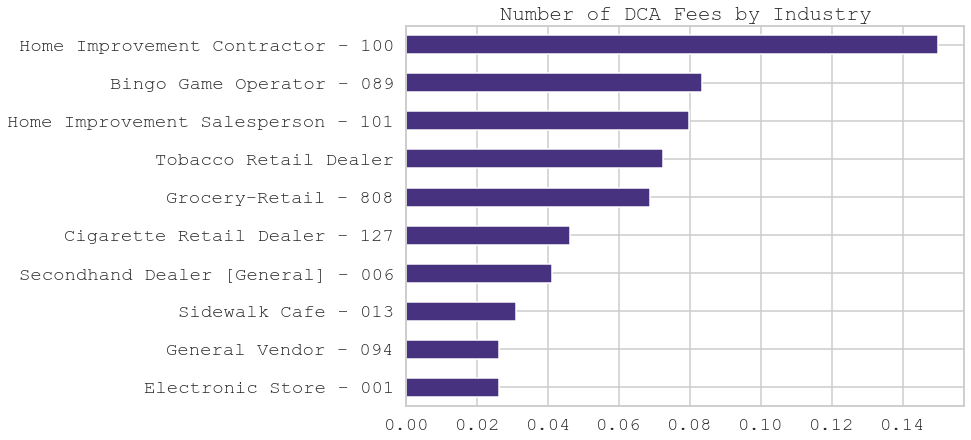

In [158]:
fees['INDUSTRY'].value_counts(normalize=True).head(10).sort_values().plot(kind='barh', 
                                                                           figsize=(10,7), 
                                                                           title='Number of DCA Fees by Industry');

### 4.2 Does this trend hold when looking at the amount of the fees (rather than just the number of fees assessed)? 

In [183]:
fees_pivot = pd.pivot_table(data=fees,
                            values='FEE AMOUNT',
                            index='INDUSTRY',
                            aggfunc='sum')

fees_pivot.sort_values(by='FEE AMOUNT', ascending=False).head(10)

,FEE AMOUNT
INDUSTRY,
Secondhand Dealer Auto - 005,"548,078,017.44"
Sidewalk Cafe - 013,"255,730,903.99"
Home Improvement Contractor - 100,"232,438,515.32"
Tobacco Retail Dealer,"147,384,082.01"
Cigarette Retail Dealer - 127,"109,378,512.85"
Tow Truck Company - 124,"97,302,277.00"
Electronic Cigarette Dealer,"86,498,369.73"
Stoop Line Stand - 033,"65,956,563.08"
Retail Laundry,"56,316,460.00"


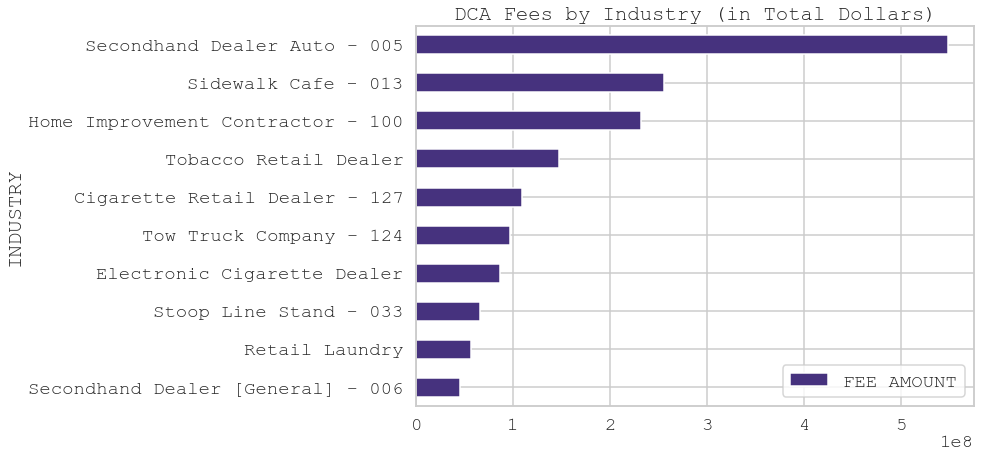

In [184]:
fees_pivot.sort_values(by='FEE AMOUNT', ascending=False).head(10).sort_values(by='FEE AMOUNT', ascending=True).plot(kind='barh', 
                                                                                                                    figsize=(10,7), 
                                                                                                                    title='DCA Fees by Industry (in Total Dollars)');

### 4.2 What is the distribution of fees by year?

In [162]:
# total number of fees by year
fees['FEE DATE'].groupby(fees['FEE DATE'].dt.year).count()

FEE DATE
1985         3
1986         4
1987        55
1988       151
1989       178
1990       102
1991       132
1992       326
1993       683
1994     18375
1995     27017
1996     23882
1997     34464
1998     36829
1999     42202
2000     48521
2001     58820
2002     67083
2003     78200
2004     70843
2005     97270
2006     80834
2007    103694
2008     83562
2009    116174
2010     90874
2011    144685
2012    112445
2013    153981
2014    141902
2015    134253
2016    130834
2017    153911
2018    139028
2019    136671
2020     72024
2021     83895
2022     81674
Name: FEE DATE, dtype: int64

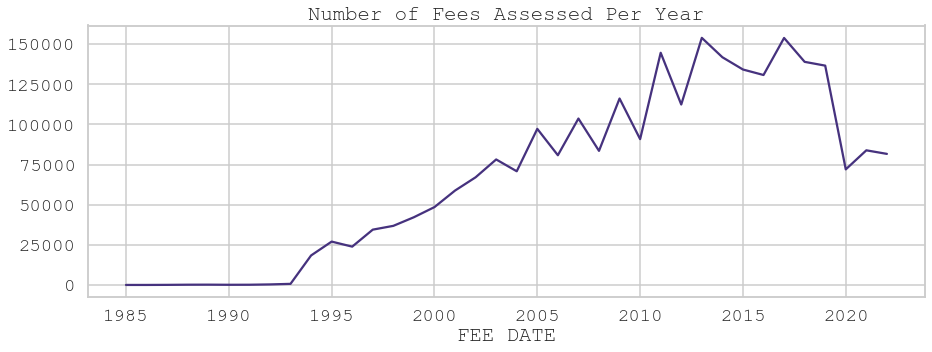

In [165]:
fees['FEE DATE'].groupby(fees['FEE DATE'].dt.year).count().plot(figsize=(15,5),
                                                                title='Number of Fees Assessed Per Year');

In [167]:
# total amount of fees by year
fees['FEE AMOUNT'].groupby(fees['FEE DATE'].dt.year).sum()

FEE DATE
1985         2,366.00
1986         2,660.00
1987       114,333.97
1988        61,300.00
1989        77,583.74
1990        71,781.41
1991       122,060.51
1992       259,774.51
1993       814,163.61
1994     3,732,506.96
1995     4,919,217.02
1996     5,046,538.31
1997     6,581,001.31
1998     7,798,266.49
1999     9,344,627.67
2000    10,657,689.91
2001    14,582,677.59
2002    16,400,507.25
2003    26,490,691.04
2004    27,888,604.73
2005    36,830,648.14
2006    48,169,008.14
2007    43,733,685.31
2008    40,229,409.97
2009    41,888,960.73
2010   564,729,883.21
2011    52,373,146.57
2012    55,487,626.90
2013    72,312,548.96
2014    63,286,383.80
2015    94,512,698.90
2016   140,233,122.42
2017    76,644,288.83
2018    75,632,526.46
2019   156,692,655.42
2020    68,047,204.49
2021    89,258,051.88
2022   190,231,361.41
Name: FEE AMOUNT, dtype: float64

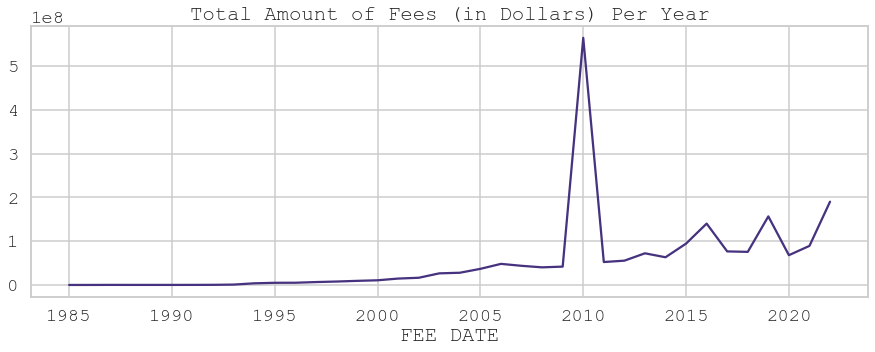

In [168]:
fees['FEE AMOUNT'].groupby(fees['FEE DATE'].dt.year).sum().plot(figsize=(15,5),
                                                                  title="Total Amount of Fees (in Dollars) Per Year");

### 4.3 What is the distribution of fees by 'FEE TYPE'

In [171]:
fees['FEE TYPE'].value_counts()

RENEWAL         703695
LICENSE         525278
TRUSTFUNDHIC    148476
CNV_SI          127132
FINGERPRINT     114445
LL VIO           87326
CL VIO           81369
OL VIO           72866
CNV_TFEE         59266
PL VIO           58976
SCALE-01         46594
TP VIO           44464
SS VIO           38288
TS VIO           35311
WH VIO           33164
DCA-SUS          26510
SWC-CON          21000
EXAMHIC          20650
WM VIO           19390
BLUEDOT          19015
BC-7 FEE         18023
PROCESSING       17655
TO VIO           16485
TAXCLEARREN      15116
CNV_MS           13487
INTEREST         10919
SWC-CON-ONL      10742
CNV_TC           10192
SWC-CIN-INT       9335
CNV_EX            9302
SCALE02           9234
APPEAL            8362
LICENSE REPL      6526
PETROL-19         6457
LATE              6249
CNV_PC            5846
PETROL-22         5131
WS VIO            5088
CNV_FS            4970
LICENSEDOC15      4728
EXAMPSI           4668
TTCINSPECT        4623
PLANREVIEW        4574
RENEWALVET 

In [173]:
# display the top ten categories only

fees['FEE TYPE'].value_counts().head(10)

RENEWAL         703695
LICENSE         525278
TRUSTFUNDHIC    148476
CNV_SI          127132
FINGERPRINT     114445
LL VIO           87326
CL VIO           81369
OL VIO           72866
CNV_TFEE         59266
PL VIO           58976
Name: FEE TYPE, dtype: int64

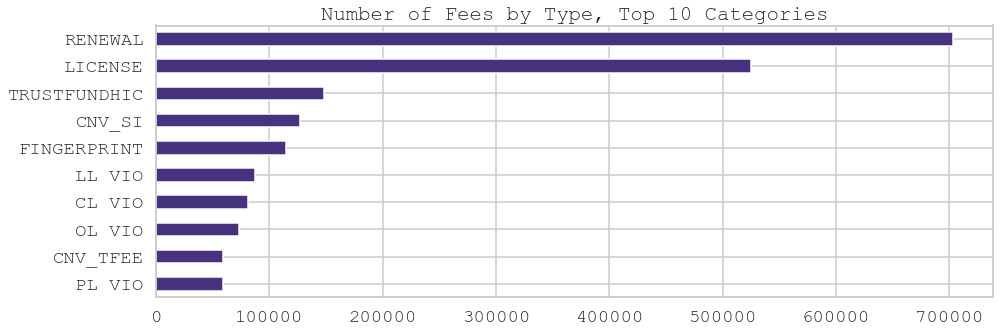

In [177]:
fees['FEE TYPE'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', 
                                              figsize=(15,5),
                                              title='Number of Fees by Type, Top 10 Categories');

In [179]:
# as before, compare this to the amount (rather than the count) of fees assessed

types_pivot = pd.pivot_table(data=fees,
                            values='FEE AMOUNT',
                            index='FEE TYPE',
                            aggfunc='sum')

types_pivot.sort_values(by='FEE AMOUNT', ascending=False).head(10)

,FEE AMOUNT
FEE TYPE,
LL VIO,"719,961,331.26"
PL VIO,"257,875,770.95"
RENEWAL,"233,561,940.56"
SWC-CON,"117,552,593.77"
SWC-CON-ONL,"93,935,977.20"
OL VIO,"88,771,593.09"
SCALE02,"56,790,400.00"
CL VIO,"56,160,978.86"
TP VIO,"54,971,031.85"


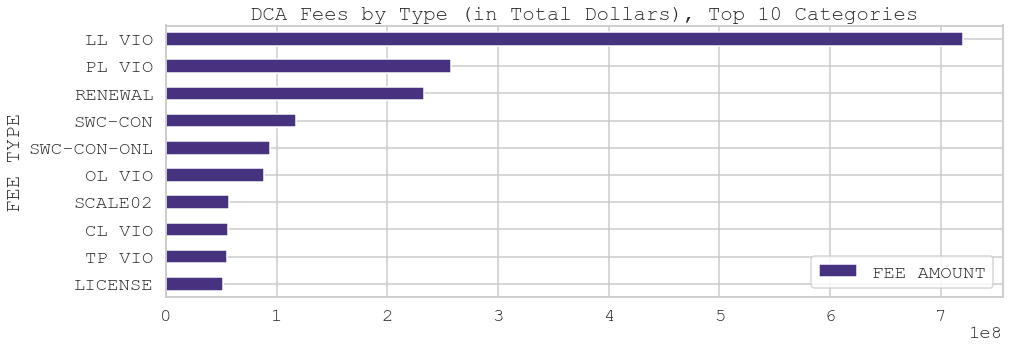

In [182]:
types_pivot.sort_values(by='FEE AMOUNT', ascending=False).head(10).sort_values(by='FEE AMOUNT', ascending=True).plot(kind='barh', 
                                                                                                                    figsize=(15,5), 
                                                                                                                    title='DCA Fees by Type (in Total Dollars), Top 10 Categories');

---

---

## **Next steps**

In [185]:
# export data for data graphic creation

fees_by_indsustry_top10 = fees_pivot.sort_values(by='FEE AMOUNT', ascending=False).head(10)

In [186]:
fees_by_indsustry_top10.to_csv('fees_by_indsustry_top10.csv')

***

---